In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

import seaborn as sns

In [2]:
# to create the Linear regression Model 

import statsmodels.formula.api as smf

In [4]:
# QQ Plot + Assumption - linearity in parameter - residual vs regressor plot 

import statsmodels.api as sm

In [5]:
#Treatment of outliers in the data

from statsmodels.graphics.regressionplots import influence_plot

In [6]:
cars = pd.read_csv('Cars.csv')
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [7]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [8]:
cars.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

In [ ]:
# All data types are correct & no missing values 
# no need for any imputation

# Multi Linear Regression

* y = m1x1 + m2x2 + ..... + c + error

* Assumptions :
    * 1. The features / predictors are independent of each other. The Dependency causes the wrong prediction
        *  ex x1 = x2 , then while calculating x1+x2 = 2x1 = 2x2 all interpretation are true, will have multiple values     
    * 2. The error / residuals are independent of each other --- RESIDUAL PLOTS , Residual vs Y predicted
        * ex. plot price ~ sqft, if error is dependent then for high values error will be high & vice versa
    * 3. error comes from Normal distribution ~ N(0,var) --- qq plots
        * Var is constant for all the errors - error ~ N(0,var) --- e/sigma = ~ N(0,1) -- we look for the similarity b/w these
          two, if the quantiles of both are close we say (e/sigma) follows ~ N(0,1) i.e Normally distributed
    
    * 4. y~ x1+x2 ... Y are in linear relations ship with parameter (x).
        * removes the effect of others & check y~x1, y~x2 .... cal errors of each 
        * if errors are linear then they are linear
        * if errors are not linear then they are also not linear
 
* Validity of assumptions is essential for correct prediction / good model
* Outliers pull the regression line towards them, find cooks dist(each pts is removed & check the deviation of model)

In [ ]:
# creating MLR Model to predict MPG from HP + VOL + SP + WT
# validate the assumption
# model improvement

## To find the Multi Collinearity :
    * Correlation Matrix
    * VIF (Variance Influence Factor) = 1/(1-R sq) -- higher the VIF Higher R Sq, MUlti collinear, remove one feature

### Corelation Matrix

In [9]:
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


<AxesSubplot:>

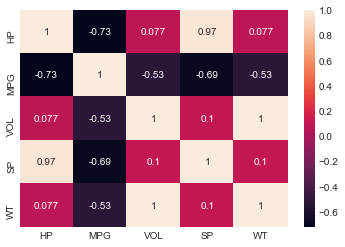

In [10]:
sns.heatmap(cars.corr(),annot=True)

In [ ]:
# from the above we can see that VOL-WT ~ r = 1 & SP-HP ~ r=0.97 Has very strong corelation
# this is against our assumption 
# lets create a model & see how it affects if we does not validate this assumption

In [11]:
car_model = smf.ols('MPG~HP+VOL+SP+WT',data=cars).fit()

In [12]:
car_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Wed, 01 Dec 2021   Prob (F-statistic):           1.54e-23
Time:                        15:40:24   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
SP             0.3956      0.158      2.500      0.015       0.080       0.711
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# read Notes above & Table for p values

# here the pvalues are very high for VOL & WT - reason is they are strongly corelated

# H0 : coefficient  = 0
# H1 : coefficient != 0

# as p values are high we accept H0 i.e MPG ~ HP+SP - no need of vOL & WT to predict MPG 
# but we know this is not possible, we need VOL & WT to predict MPG

# this is happening due to strong linear relationship b/w them

### Calculating VIF - Variance inflation Factor (1/(1-R^2)

In [ ]:
# same is checked With VIF

In [ ]:
### collinearity is measured by VIF
### check dependency of explanotary variables with each other

#    WT~VOL+SP+HP   --- Predicting WT from VOL+SP+HP
#    VOL~WT+SP+HP   --- Predicting VOL from WT+SP+HP
#    SP~WT+VOL+HP   --- Predicting SP from WT+VOL+HP 
#    HP~WT+VOL+SP   --- Predicting HP from WT+VOL+SP

### WE expect the bad model as its outcome 
# i.e less R2 score = less VIF means they are independent on each other which is our assumption

In [18]:
rsq_wt = smf.ols('WT~VOL+SP+HP',data = cars).fit().rsquared
vif_wt = 1 / (1- rsq_wt)

rsq_vol = smf.ols('VOL~WT+SP+HP',data = cars).fit().rsquared
vif_vol = 1 / (1- rsq_vol)

rsq_sp = smf.ols('SP~WT+VOL+HP',data = cars).fit().rsquared
vif_sp = 1 / (1- rsq_sp)

rsq_hp = smf.ols('HP~WT+VOL+SP',data = cars).fit().rsquared
vif_hp = 1 / (1- rsq_hp)

d = {'Variables' :['WT','Vol','SP','HP'],'VIF': [vif_wt,vif_vol,vif_sp,vif_hp]}

vif_df = pd.DataFrame(d)
vif_df

,Variables,VIF
0,WT,639.533818
1,Vol,638.806084
2,SP,20.007639
3,HP,19.926589


In [ ]:
# as VIF are high means the VOl & WT are dependent which is against our assumption
# VIF=1 to infinity,VIF value - for good model its above 400-500(predicting linear relationship which is against our assumption)
# VIF directly proportional to r sq

# VIF above 10 is of concern 

In [ ]:
# We cross check by creating Model for MPG ~ Vol & MPG~WT

In [13]:
model_vol = smf.ols('MPG~VOL',data=cars).fit()
model_vol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     30.71
Date:                Wed, 01 Dec 2021   Prob (F-statistic):           3.82e-07
Time:                        15:40:31   Log-Likelihood:                -280.28
No. Observations:                  81   AIC:                             564.6
Df Residuals:                      79   BIC:                             569.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     55.8171      3.957     14.106      0.000      47.941      63.693
VOL           -0.2166      0.039     -5.541      0.000      -0.294      -0.139
==============================================================================
Omnibus:                        2.691   Durbin-Watson:                   0.566
Prob(Omnibus):                  0.260   Jarque-Bera (JB):                1.997
Skew:                          -0.263   Prob(JB):                        0.368
Kurtosis:                       3.562   Cond. No.                         462.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
model_wt = smf.ols('MPG~WT',data=cars).fit()
model_wt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     30.34
Date:                Wed, 01 Dec 2021   Prob (F-statistic):           4.38e-07
Time:                        15:40:32   Log-Likelihood:                -280.42
No. Observations:                  81   AIC:                             564.8
Df Residuals:                      79   BIC:                             569.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     55.2296      3.876     14.249      0.000      47.514      62.945
WT            -0.6420      0.117     -5.508      0.000      -0.874      -0.410
==============================================================================
Omnibus:                        2.735   Durbin-Watson:                   0.555
Prob(Omnibus):                  0.255   Jarque-Bera (JB):                2.045
Skew:                          -0.263   Prob(JB):                        0.360
Kurtosis:                       3.573   Cond. No.                         149.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# From above we came to know that the VOL & WT are necessary to predict MPG
# Why this is happening, lets try MPG~VOL+WT

In [15]:
model_vol_wt = smf.ols('MPG~VOL+WT',data=cars).fit()
model_vol_wt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     15.33
Date:                Wed, 01 Dec 2021   Prob (F-statistic):           2.43e-06
Time:                        15:40:36   Log-Likelihood:                -280.16
No. Observations:                  81   AIC:                             566.3
Df Residuals:                      78   BIC:                             573.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     56.8847      4.534     12.546      0.000      47.858      65.912
VOL           -0.6983      0.984     -0.710      0.480      -2.658       1.261
WT             1.4349      2.929      0.490      0.626      -4.397       7.266
==============================================================================
Omnibus:                        2.405   Durbin-Watson:                   0.591
Prob(Omnibus):                  0.300   Jarque-Bera (JB):                1.712
Skew:                          -0.251   Prob(JB):                        0.425
Kurtosis:                       3.506   Cond. No.                         597.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# again the p values are very high & against reality
# in such cases we remove one feature
# as each one can explain other we are taking 1 with high r squared value

In [16]:
# Dropping wt
car_model_vol = smf.ols('MPG~HP+VOL+SP',data=cars).fit()
car_model_vol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     86.11
Date:                Wed, 01 Dec 2021   Prob (F-statistic):           1.56e-24
Time:                        15:40:41   Log-Likelihood:                -233.99
No. Observations:                  81   AIC:                             476.0
Df Residuals:                      77   BIC:                             485.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.9234     14.466      2.069      0.042       1.118      58.729
HP            -0.2067      0.039     -5.353      0.000      -0.284      -0.130
VOL           -0.2017      0.023     -8.928      0.000      -0.247      -0.157
SP             0.4007      0.156      2.571      0.012       0.090       0.711
==============================================================================
Omnibus:                       10.810   Durbin-Watson:                   1.389
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.822
Skew:                           0.704   Prob(JB):                      0.00271
Kurtosis:                       4.233   Cond. No.                     5.87e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
car_model_wt = smf.ols('MPG~HP+SP+WT',data=cars).fit()
car_model_wt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     85.68
Date:                Wed, 01 Dec 2021   Prob (F-statistic):           1.81e-24
Time:                        15:40:42   Log-Likelihood:                -234.15
No. Observations:                  81   AIC:                             476.3
Df Residuals:                      77   BIC:                             485.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.7848     14.490      1.986      0.051      -0.069      57.639
HP            -0.2085      0.039     -5.386      0.000      -0.286      -0.131
SP             0.4078      0.156      2.609      0.011       0.097       0.719
WT            -0.5994      0.067     -8.895      0.000      -0.734      -0.465
==============================================================================
Omnibus:                       10.924   Durbin-Watson:                   1.370
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               12.048
Skew:                           0.705   Prob(JB):                      0.00242
Kurtosis:                       4.257   Cond. No.                     5.23e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# now all the p values are less

## Residual Analysis

### Assumption : error ~N(0,var)
* Test for Normality of Residuals (Q-Q Plot)

Text(0.5, 1.0, 'Q-Q plot of residuals')

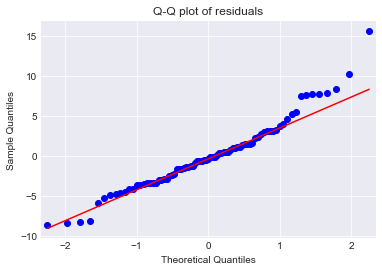

In [19]:
# assumption is that error / residual is independent of variables x and comes from N(0,var)
#residual = actual y- predicted y

qqplots = sm.qqplot(car_model.resid,line = 'q')
plt.title("Q-Q plot of residuals")

In [ ]:
# as the majority of points are close to the red line - hence we can conclude that they are from Normal Distribution

In [20]:
list(np.where(car_model.resid>10))

[array([ 0, 76], dtype=int64)]

### Assumption - Non Linearity / Independent  Error
* Residual Plot for Homoscedasticity  
* expect r=0 - no corelation

* Plot - error vs fitted values y^

Text(0, 0.5, 'Residuals / Errors')

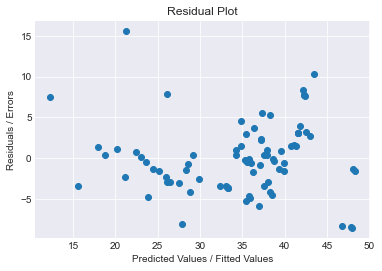

In [21]:
plt.scatter(car_model.fittedvalues,car_model.resid)

plt.title('Residual Plot')
plt.xlabel('Predicted Values / Fitted Values')
plt.ylabel('Residuals / Errors')

In [ ]:
# we can see no trend b/w the error vs variables 
# means error are independent of variables

# erroes lies b/w +10 to -10

In [22]:
def std_value(val):
    return (val-val.mean())/val.std()

Text(0, 0.5, 'Residuals / Errors')

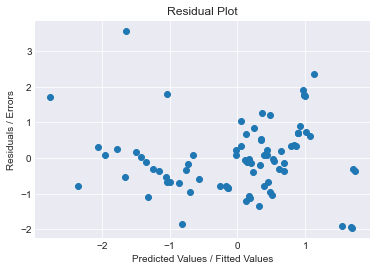

In [23]:
plt.scatter(std_value(car_model.fittedvalues),std_value(car_model.resid))

plt.title('Residual Plot')
plt.xlabel('Predicted Values / Fitted Values')
plt.ylabel('Residuals / Errors')

## Assumption : Linear In Parameter

* Residual Vs Regressors
* **Throwing effect of one another**
*  Y ~ all Except x1    --- error 1
* x1 ~ all except x1    --- error 2
* Observe co relation between error 1 & 2, if co related  we cxan say Y & X1 is corelated

In [ ]:
## Residual Vs Regressors ( variables / explanotary / feature )

<Figure size 1296x576 with 0 Axes>

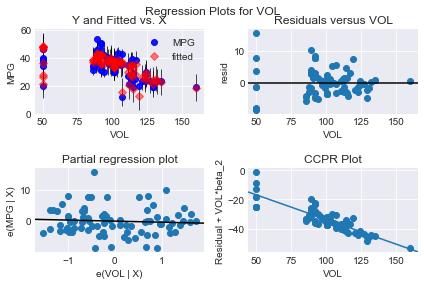

In [24]:
plt.figure(figsize=(18,8))
fig1 = sm.graphics.plot_regress_exog(car_model,'VOL')

# throwing effect of other MPG~Vol 

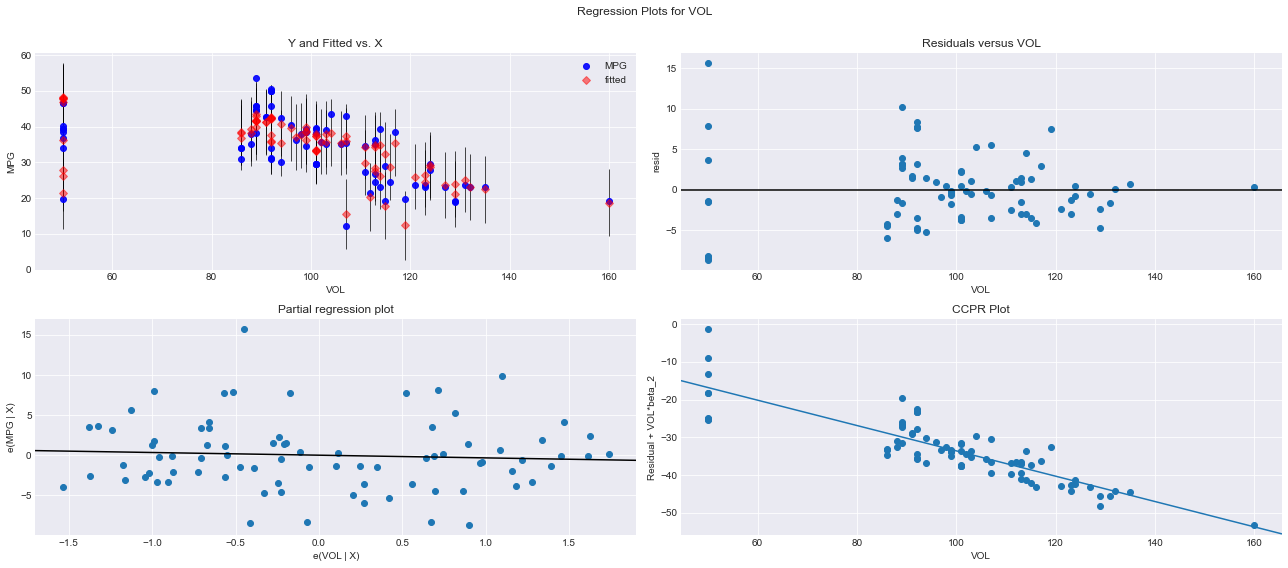

In [25]:
f= plt.figure(figsize=(18,8))

plot_regressor_vol = sm.graphics.plot_regress_exog(car_model,'VOL',fig = f)

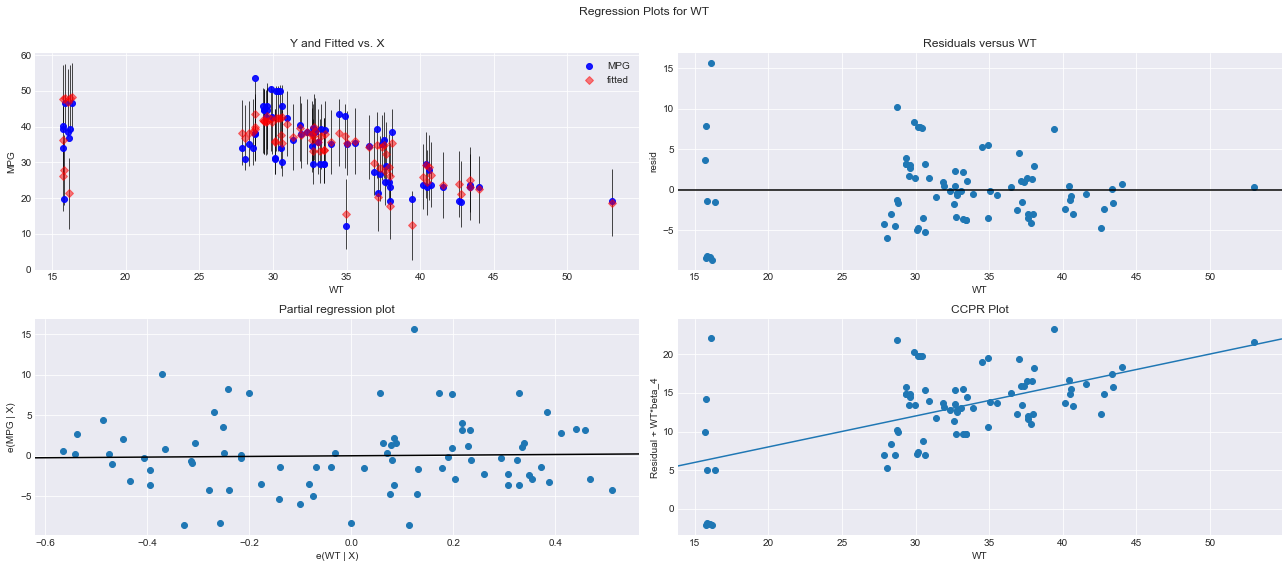

In [26]:
f= plt.figure(figsize=(18,8))

plot_regressor_wt = sm.graphics.plot_regress_exog(car_model,'WT',fig = f)

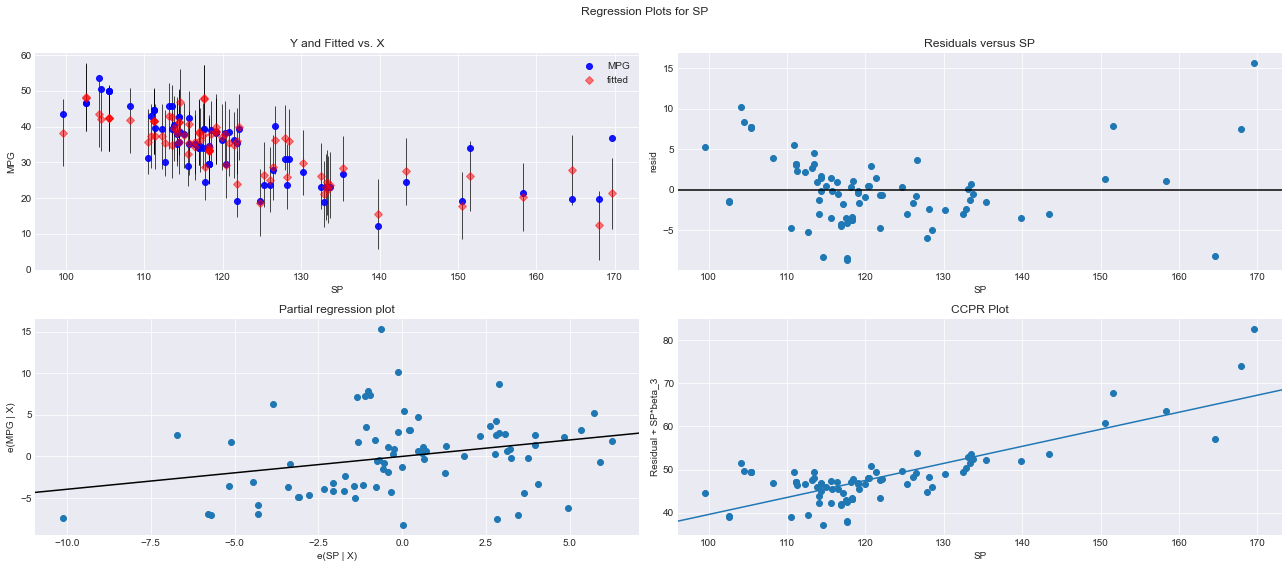

In [27]:
f= plt.figure(figsize=(18,8))

plot_regressor_sp = sm.graphics.plot_regress_exog(car_model,'SP',fig = f)

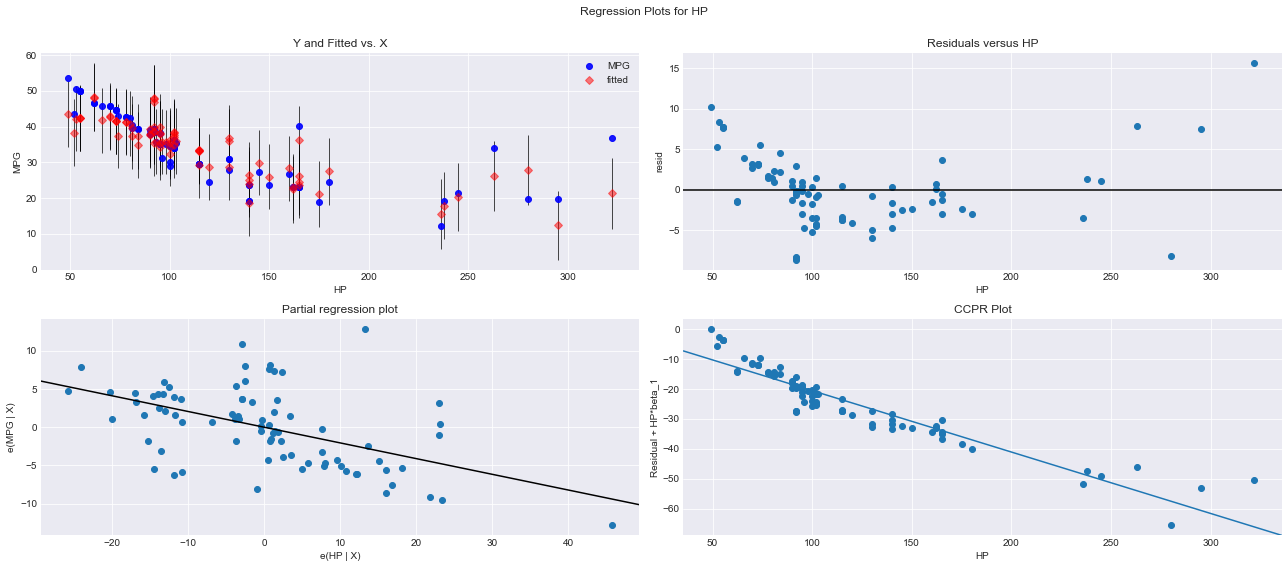

In [28]:
f= plt.figure(figsize=(18,8))

plot_regressor_hp = sm.graphics.plot_regress_exog(car_model,'HP',fig = f)

In [ ]:
# 3rd plot - assumption - linearity with Parameter

## Model Deletion Diagnostics

* Treating Outliers
* Detecting Outliers / Influencer
* Cook's Distance 

### By Cooks Distance

In [29]:
car_influence = car_model.get_influence()

(c,_)=car_influence.cooks_distance

In [30]:
c

array([6.04797739e-02, 2.80207825e-02, 1.84833331e-02, 7.27752720e-03,
       2.96019879e-02, 4.81278004e-03, 2.07405847e-02, 2.55586700e-03,
       4.05692942e-03, 7.54004910e-04, 2.97311924e-03, 8.72887201e-02,
       3.32487183e-04, 3.06716174e-03, 5.27414633e-03, 5.29293219e-03,
       1.16531605e-03, 7.63273362e-02, 6.47114749e-04, 5.79692771e-04,
       1.13359020e-05, 1.03054091e-02, 1.53244850e-04, 3.10730928e-04,
       1.49488694e-03, 5.85742198e-02, 1.00598054e-02, 6.55605611e-05,
       3.30438001e-02, 1.81295962e-04, 1.33814932e-02, 9.97753151e-04,
       4.02570308e-04, 1.13711936e-03, 2.85608656e-03, 4.41332141e-05,
       3.27632348e-04, 4.70959014e-03, 1.21704644e-02, 8.96948188e-03,
       2.35324656e-04, 9.75839299e-06, 4.49488700e-03, 4.48437031e-03,
       1.02593360e-05, 4.75617324e-04, 2.22586830e-05, 4.66305687e-05,
       1.27051048e-02, 5.33728062e-03, 2.98638028e-03, 5.00671925e-03,
       1.29659561e-04, 1.14393086e-02, 8.61438068e-04, 2.46695414e-04,
      

In [31]:
_

array([0.99749559, 0.999611  , 0.99986003, 0.99998609, 0.99955511,
       0.99999503, 0.9998141 , 0.99999897, 0.99999675, 0.99999995,
       0.9999985 , 0.99403955, 0.99999999, 0.99999838, 0.99999376,
       0.9999937 , 0.99999986, 0.99565009, 0.99999997, 0.99999997,
       1.        , 0.999967  , 1.        , 0.99999999, 0.99999973,
       0.99767993, 0.99996892, 1.        , 0.9994181 , 1.        ,
       0.99993697, 0.9999999 , 0.99999999, 0.99999986, 0.99999865,
       1.        , 0.99999999, 0.99999529, 0.99995016, 0.99997662,
       1.        , 1.        , 0.99999581, 0.99999583, 1.        ,
       0.99999998, 1.        , 1.        , 0.99994456, 0.99999357,
       0.99999849, 0.99999452, 1.        , 0.99995725, 0.99999993,
       1.        , 0.99992953, 0.99999327, 0.99994468, 0.99999732,
       0.99999879, 0.99995818, 0.99999979, 0.99999741, 0.9999988 ,
       0.99974271, 0.99999212, 1.        , 0.99999997, 0.99999956,
       0.94273321, 0.99999996, 1.        , 1.        , 0.99981

Text(0, 0.5, 'Cooks Distance')

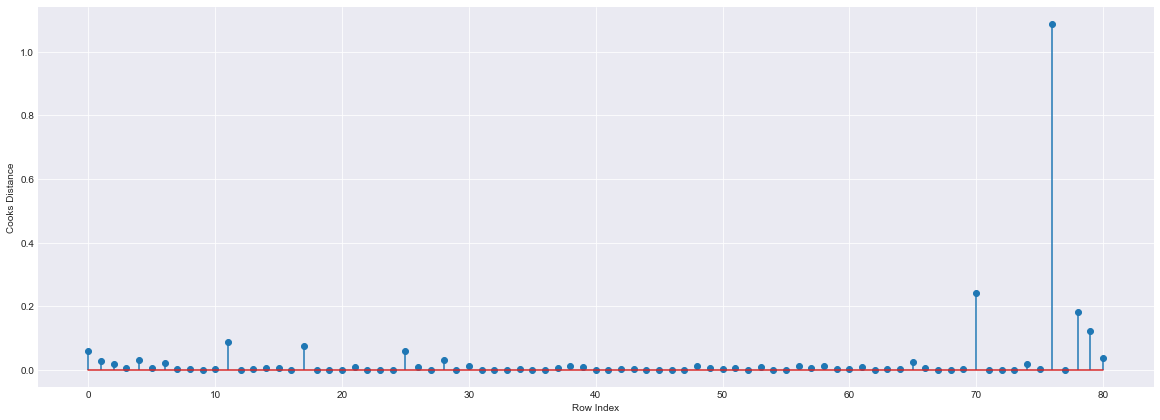

In [32]:
# Plot the influencers values using stem plot

plt.figure(figsize=(20,7))
plt.stem(np.arange(len(cars)),np.round(c,3)) # (x axis length, cooks dist)
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')


In [33]:
len(cars)

81

In [34]:
#index and value of influencer where c is more than .5

(np.argmax(c), np.max(c))

(76, 1.0865193998180014)

### Influence Plots

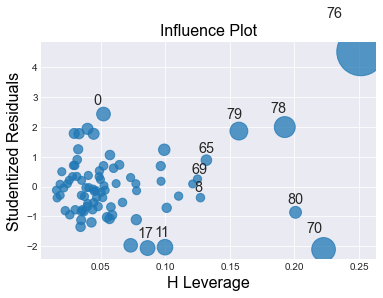

In [35]:
# from statsmodels.graphics.regressionplots import influence_plot

influence_plot(car_model)
plt.show()

In [36]:
### Leverage Cut Off

k = cars.shape[1]  # k no of columns - no of feature / independent variables
n = cars.shape[0]  # n no of rows  - no of data points / observations

leverage_cutoff = 3*((k+1)/n)

In [37]:
leverage_cutoff

0.2222222222222222

#### From the above plot, it is evident that data point 70 and 76 are the influencers

In [38]:
cars[cars.index.isin([70,76])]

,HP,MPG,VOL,SP,WT
70,280,19.678507,50,164.598513,15.823060
76,322,36.900000,50,169.598513,16.132947


In [39]:
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [ ]:
# we can clearly see the outlier - HP column

## Improving the model

* Delete the outliers
* Build New Model

In [ ]:
# Improving the model by deleting the influencer points

In [40]:
#Discard the data points which are influencers and reasign the row number (reset_index())
cars_new = cars.drop(cars.index[[70,76]],axis=0).reset_index()

In [41]:
cars_new

,index,HP,MPG,VOL,SP,WT
0,0,49,53.700681,89,104.185353,28.762059
1,1,55,50.013401,92,105.461264,30.466833
2,2,55,50.013401,92,105.461264,30.193597
3,3,70,45.696322,92,113.461264,30.632114
4,4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...,...
74,75,175,18.762837,129,132.864163,42.778219
75,77,238,19.197888,115,150.576579,37.923113
76,78,263,34.000000,50,151.598513,15.769625
77,79,295,19.833733,119,167.944460,39.423099


In [42]:
cars_new.drop('index',axis=1,inplace=True)

In [43]:
cars_new

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113
76,263,34.000000,50,151.598513,15.769625
77,295,19.833733,119,167.944460,39.423099


In [44]:
# Build a new model based on new data

#Exclude variable "VOL" and generate R-Squared and AIC values
cars_new_model_wt = smf.ols('MPG ~ WT+HP+SP',data=cars_new).fit()

(cars_new_model_wt.rsquared,cars_new_model_wt.aic)


(0.8160034320495304, 446.18843235750313)

In [45]:
#Exclude variable "WT" and generate R-Squared and AIC values

cars_new_model_vol = smf.ols('MPG ~ VOL+HP+SP',data=cars_new).fit()

(cars_new_model_vol.rsquared,cars_new_model_vol.aic)

(0.8161692010376009, 446.11722639447714)

In [ ]:
''' Comparing above R-Square and AIC values, model 'cars_new_model_vol' has high R- square and low AIC value 
hence include variable 'VOL' so that multi collinearity problem would be resolved '''

Text(0, 0.5, 'Cooks Distance')

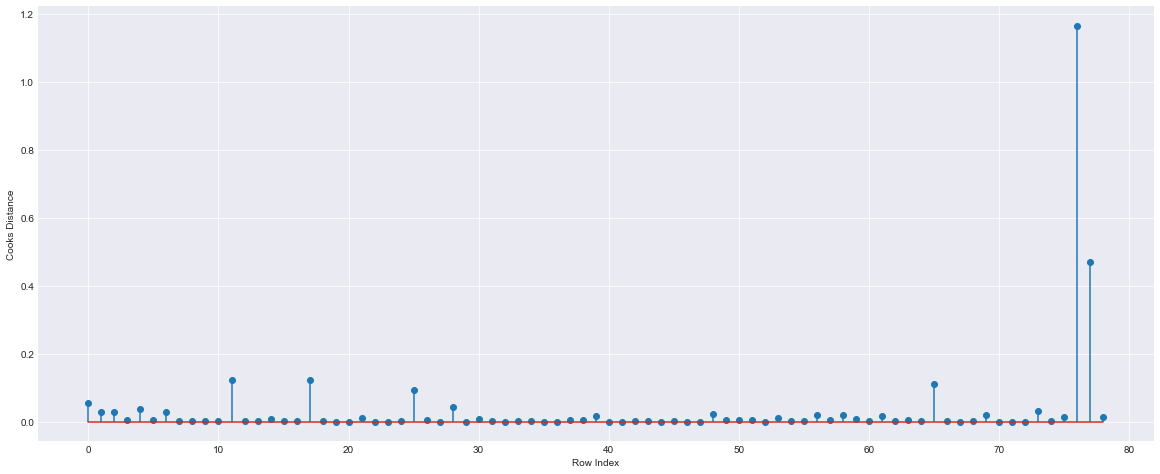

In [46]:
# cooks distance 
cars_new_influence = cars_new_model_vol.get_influence()

(c,d) = cars_new_influence.cooks_distance

plt.figure(figsize=(20,8))
plt.stem(np.arange(len(cars_new)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')

In [47]:
(np.argmax(c),np.max(c))

(76, 1.1629387469135193)

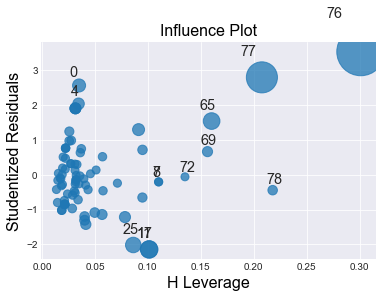

In [48]:
# same can be seen from influence plot

influence_plot(cars_new_model_vol)
plt.show()

In [ ]:
# pts 76 & 77 are outliers

In [49]:
list(np.where(c>0.5))

[array([76], dtype=int64)]

In [50]:
cars_new[cars_new.index.isin([76,77])]

,HP,MPG,VOL,SP,WT
76,263,34.000000,50,151.598513,15.769625
77,295,19.833733,119,167.944460,39.423099


In [51]:
# further improving the model

car2 = cars_new.drop(cars_new.index[[76,77]],axis=0).reset_index()

In [52]:
car2

,index,HP,MPG,VOL,SP,WT
0,0,49,53.700681,89,104.185353,28.762059
1,1,55,50.013401,92,105.461264,30.466833
2,2,55,50.013401,92,105.461264,30.193597
3,3,70,45.696322,92,113.461264,30.632114
4,4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...,...
72,72,140,19.086341,160,124.715241,52.997752
73,73,140,19.086341,129,121.864163,42.618698
74,74,175,18.762837,129,132.864163,42.778219
75,75,238,19.197888,115,150.576579,37.923113


In [53]:
car2.drop('index',axis=1,inplace=True)

In [54]:
car2_model = smf.ols('MPG~VOL+HP+SP',data=car2).fit()

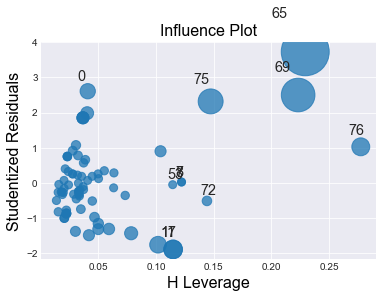

In [55]:
influence_plot(car2_model)
plt.show()

In [56]:
car2_influence = car2_model.get_influence()
(d,e)=car2_influence.cooks_distance

Text(0, 0.5, 'Cooks Distance')

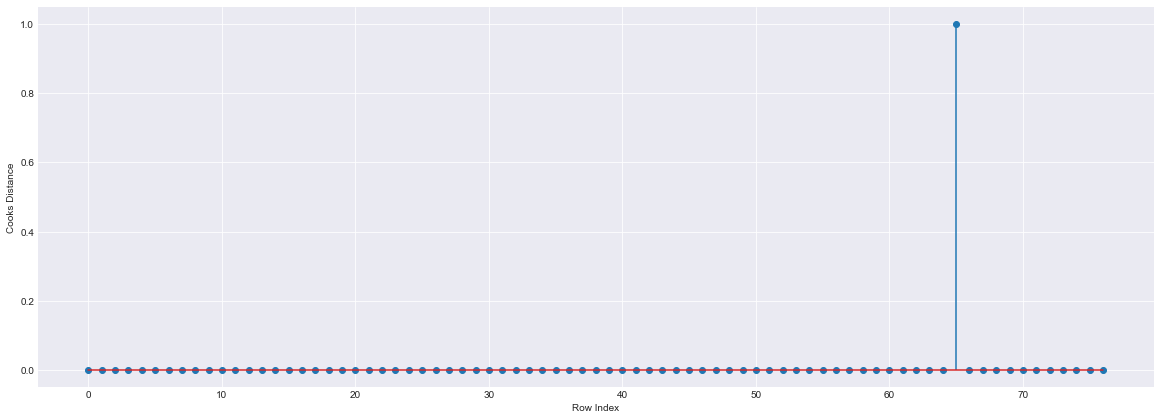

In [57]:
plt.figure(figsize=(20,7))
plt.stem(np.arange(len(car2)),np.round(d))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')

In [58]:
(np.argmax(d),np.max(d))

(65, 0.8774556986296647)

#### Since the value is <1 , we can stop the diagnostic process and finalize the model

In [59]:
(car2_model.rsquared, car2_model.aic)

(0.8669636111859063, 409.41530627195084)

In [60]:
car2[car2.index.isin([65])]


,HP,MPG,VOL,SP,WT
65,165,40.05,50,126.598513,15.712859


In [61]:
car3 = car2.drop(car2.index[65],axis=0).reset_index()

In [62]:
car3.drop('index',axis=1,inplace=True)

<StemContainer object of 3 artists>

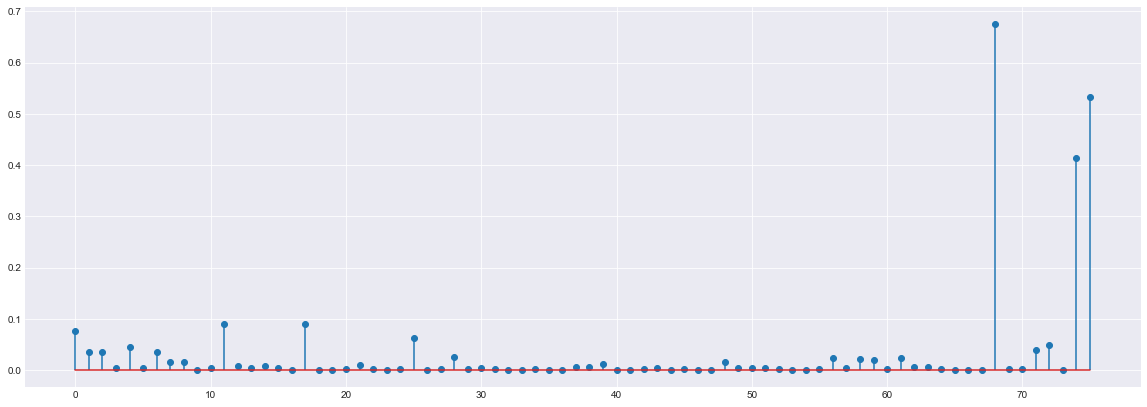

In [63]:
# finding influencing point after creating a module
# if max bvalue is less than 1 accept the model

car3_mdl = smf.ols('MPG~VOL+HP+SP',data=car3).fit()

car3_influence = car3_mdl.get_influence()
(c1,d1) = car3_influence.cooks_distance

plt.figure(figsize=(20,7))
plt.stem(np.arange(len(car3)),np.round(c1,3))


In [64]:
car3_mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     190.2
Date:                Wed, 01 Dec 2021   Prob (F-statistic):           3.87e-34
Time:                        15:47:50   Log-Likelihood:                -191.90
No. Observations:                  76   AIC:                             391.8
Df Residuals:                      72   BIC:                             401.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.2567     10.793      1.414      0.162      -6.258      36.772
VOL           -0.1048      0.021     -4.887      0.000      -0.148      -0.062
HP            -0.2970      0.030    -10.055      0.000      -0.356      -0.238
SP             0.5203      0.115      4.538      0.000       0.292       0.749
==============================================================================
Omnibus:                       12.199   Durbin-Watson:                   0.931
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.710
Skew:                           0.941   Prob(JB):                      0.00174
Kurtosis:                       3.685   Cond. No.                     5.86e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.86e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Predicting for new data

In [65]:
#New data for prediction
new_data = pd.DataFrame({'HP':40,"VOL":95,"SP":102,"WT":35},index=[1])

In [67]:
car3_mdl.predict(new_data)

1    46.48671
dtype: float64

In [68]:
car2_model.predict(new_data)

1    46.035594
dtype: float64

In [ ]:
# see the diff in predicted values for Car2 & Car3

In [69]:
car2_model.predict(car2)

0     45.428872
1     43.992392
2     43.992392
3     43.508150
4     44.085858
        ...    
72    20.679595
73    23.666406
74    19.212878
75    12.198598
76     9.161202
Length: 77, dtype: float64

In [70]:
car3_mdl.predict(car2)

0     45.579291
1     44.146382
2     44.146382
3     43.853072
4     44.220177
        ...    
72    21.786946
73    23.553190
74    18.879841
75    10.849230
76     6.696138
Length: 77, dtype: float64